In [1]:
import pandas as pd
import numpy as np
import math

path = r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\danmu\112522\112522_5.csv"
f = pd.read_csv(path, low_memory=False)

In [2]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      3001 non-null   int64 
 1   text      3001 non-null   object
 2   userid    3001 non-null   object
 3   danmu_sn  3001 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 93.9+ KB


In [3]:
# f['userid'].value_counts().sort_values
# 3001/1448

In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

danmu_count_10s = np.zeros((16,150)) # 150 1500 

for i in range(16):
    path = r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\danmu\112522\112522_"+ str(i+1) + ".csv"
    f = pd.read_csv(path, low_memory=False)
    f['time'] = f['time']/100
    
    for t in range(math.ceil(f['time'].max())):
        danmu_count_10s[i,t] = f[(f['time'] >= t) & (f['time'] < t+1 )]['time'].count()

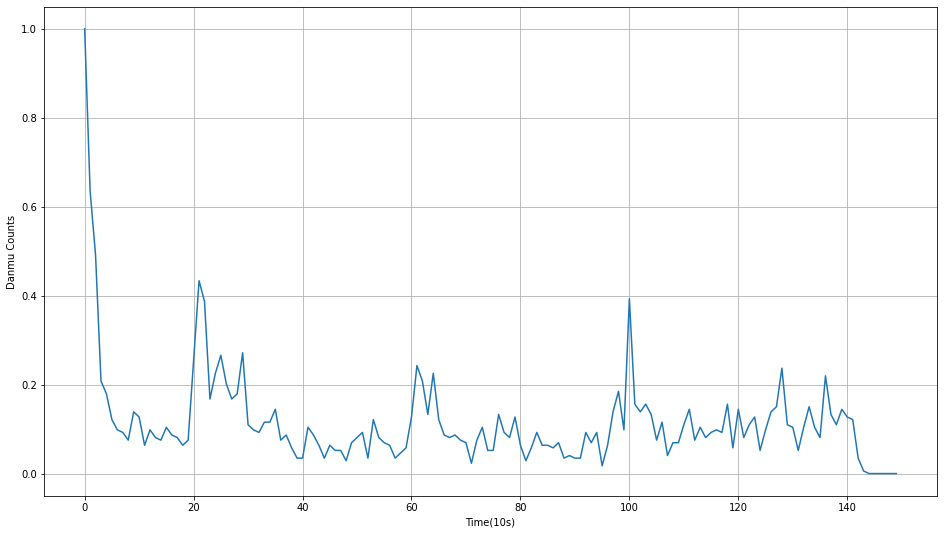

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.DataFrame()
i = 0
df['danmu_counts'] = danmu_count_10s[i]
scaler = MinMaxScaler()
df["Standarded"] = scaler.fit_transform(df)

plt.figure(figsize=(16,9))
plt.xlabel('Time(10s)')
plt.ylabel('Danmu Counts')
plt.grid(True)
plt.plot(df['Standarded'])

In [18]:
# for i in range(16):
#     # plt.subplot(4,4,i+1)
#     plt.figure(figsize=(16,9))
#     plt.xlabel('Time(1s)')
#     plt.ylabel('Danmu Counts')
#     plt.grid(True)
#     plt.plot(danmu_count_1s[i])
#     plt.savefig(r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\Output\1s_112522_" +str(i+1)+".png", dpi=300)
# plt.show()

In [20]:
result_10 = np.zeros((16, 5)) # max, min ,mean, std, sum
for i in range(16):
    result_10[i,0]=danmu_count_10s[i].max()
    result_10[i,1]=danmu_count_10s[i].min()
    result_10[i,2]=danmu_count_10s[i].mean()
    result_10[i,3]=danmu_count_10s[i].std()
    result_10[i,4]=danmu_count_10s[i].sum()

In [50]:
i=0
print(danmu_count_10s[i][danmu_count_10s[i] > ((result_10[i,2]-1) + (2*result_10[i,3]-1))])
temp = list(np.where(danmu_count_10s[i] > ((result_10[i,2]-1) + (2*result_10[i,3]-1))))
print(hot_moment)

[173. 110.  85.  75.  67.  68.]
[array([  0,   1,   2,  21,  22, 100], dtype=int64)]


In [52]:
hot_moment = []
for i in temp[0]:
    hot_moment.append(i)

In [54]:
hot_moment

[0, 1, 2, 21, 22, 100]

In [55]:
i=0
path = r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\danmu\112522\112522_"+ str(i+1) + ".csv"
f = pd.read_csv(path, low_memory=False)
f['time'] = f['time']/100
f[(f['time'] >= hot_moment[0]) & (f['time'] < hot_moment[0]+1 )]['text']

0             ㄢㄢ
1              簽
2             二刷
3      簽簽簽!!! 神作
4             簽啦
         ...    
168        b站观光团
169        簽 神作啊
170            簽
171           簽到
172            簽
Name: text, Length: 173, dtype: object